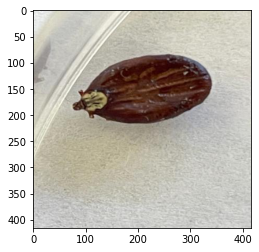

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

image = skimage.io.imread("000001_0.jpg")
fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

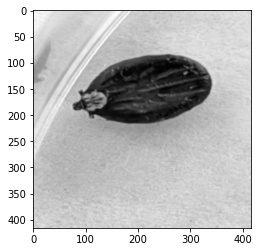

In [8]:
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")
plt.show()

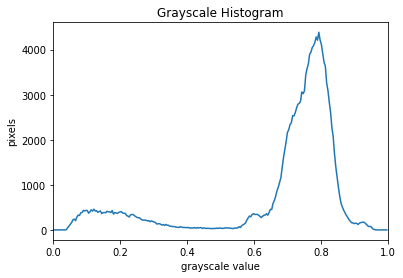

In [9]:
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

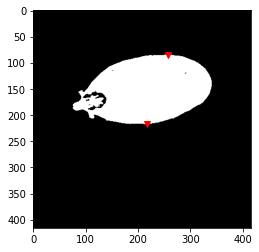

In [55]:
t = 0.5
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.plot(257, 84, marker='v', color="red")
plt.plot(217, 217, marker='v', color = "red")
plt.imshow(binary_mask, cmap="gray")
plt.show()

In [100]:
image = np.array(binary_mask)
white_pixels = np.array(np.where(image == 1))
first_white_pixel = white_pixels[:,0]
last_white_pixel = white_pixels[:,-1]
print(first_white_pixel)
print(last_white_pixel)

[ 84 257]
[217 217]


In [104]:
print(white_pixels)

[[ 84  84  84 ... 217 217 217]
 [257 258 259 ... 215 216 217]]


In [1]:
!pip install opencv-python

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
  Using cached opencv-python-4.3.0.38.tar.gz (88.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /var/folders/1f/cdbrvc6n3mb2q5k3m0jpgm9c5sjng3/T/tmpJ2zmE7
       cwd: /private/var/folders/1f/cdbrvc6n3mb2q5k3m0jpgm9c5sjng3/T/pip-install-65GgnX/opencv-python
  Complete ou

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('test_direct/78595299.jpg',0)

ret,thresh2 = cv.threshold(img,0,255,cv.THRESH_BINARY_INV + cv2.THRESH_OTSU) # 127

plt.subplot(2,3,1),plt.imshow(thresh2,'gray',vmin=0,vmax=255)
plt.title('BINARY_INV')
plt.xticks([]),plt.yticks([])





NameError: name 'cv2' is not defined

In [126]:
num = 0   
for value in thresh2[:,num]:
    if value == 255:
        x = num # /len(thres2)
        print(int(x))
        break 
    else:
        num += 1
        continue 



In [1]:
# boudingbox generator

import cv2
import numpy as np
import glob
import os 

def threshold_image(image_path):

    image = cv2.imread(image_path)
    original = image.copy()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]  

    ROI_number = 0
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
        print(x,y,w,h)

    cv2.imshow('image', image)
    cv2.imshow('Thresh',thresh)
    cv2.waitKey()

for jpgfile in glob.iglob(os.path.join('test_direct', "*.jpg")):
    threshold_image(jpgfile)

51 473 1 2
43 472 7 11
46 470 2 2
54 469 3 2
104 468 1 2
59 467 1 2
56 467 1 1
68 465 2 1
56 465 1 1
108 464 1 2
79 462 2 2
58 461 3 5
70 460 1 2
61 458 1 1
81 457 3 4
67 456 1 1
113 453 1 1
75 453 7 9
68 452 2 2
62 452 2 3
77 450 1 2
70 450 1 1
50 450 1 1
115 448 1 1
66 448 1 1
63 447 2 1
51 447 2 1
68 444 4 4
120 441 1 1
118 439 1 1
99 438 1 1
71 438 2 4
117 436 1 2
131 431 2 1
113 426 6 5
114 423 3 3
117 417 3 8
160 404 1 2
194 380 2 1
185 380 1 1
195 376 2 3
227 367 1 1
194 366 1 3
193 363 1 1
207 362 3 3
220 360 1 1
206 358 1 1
223 357 1 1
225 356 1 1
198 354 4 6
202 353 2 1
206 349 1 1
202 349 1 1
217 342 1 2
365 330 2 2
384 329 1 2
230 328 1 1
365 327 1 1
209 326 1 1
381 325 3 3
373 325 3 2
400 324 1 1
365 324 1 1
418 323 1 1
395 323 2 2
378 323 2 1
211 323 1 1
412 322 3 2
209 322 1 1
388 321 2 1
212 321 1 1
203 321 2 2
397 320 1 1
374 320 3 2
429 318 1 1
370 317 1 1
204 316 1 1
368 315 1 1
205 315 7 6
401 314 4 3
421 313 2 1
211 312 2 2
207 312 3 3
454 311 1 1
463 309 2 2
455 3

: 